In [5]:
from Myfunc import * 
mysetting()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family="Noto Sans KR", size=9) # 한글 폰트 설정
plt.rc("axes", unicode_minus=False) # 음수값 깨지는 폰트 설정
pd.options.display.max_columns = 50 # 칼럼수 50개까지




In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



plt.rc("font", family="NanumGothic", size=9) # 한글 폰트 설정
plt.rc("axes", unicode_minus=False) # 음수값 깨지는 폰트 설정
pd.options.display.max_columns = 50 # 칼럼수 50개까지

In [38]:
import warnings
warnings.filterwarnings(action='ignore')

In [253]:
df = pd.read_csv("data/cardio_train.csv", sep=";")

In [254]:
X = df.drop("cardio", axis=1)
y = df.cardio

In [159]:
from sklearn.model_selection import train_test_split

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,  stratify=y)

In [358]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63000, 12), (7000, 12), (63000,), (7000,))

In [359]:
df = pd.concat([X_train, y_train], axis=1)

In [360]:
resumetable(df)

데이터 셋 형상 : (63000, 13)


,피처,데이터 타입,결측값 개수,고윳값 개수,1번째,2번째,3번째,4번째,5번째
0,id,int64,0,63000,"[49914, 1]","[18592, 1]","[41689, 1]","[37806, 1]","[84399, 1]"
1,age,int64,0,8009,"[21664, 7]","[19633, 23]","[14613, 11]","[19674, 18]","[15134, 6]"
2,gender,int64,0,2,"[1, 41025]","[2, 21975]","[NaN, NaN]","[NaN, NaN]","[NaN, NaN]"
3,height,int64,0,103,"[169, 2516]","[177, 410]","[166, 1779]","[158, 2945]","[152, 1036]"
4,weight,float64,0,276,"[68.0, 2576]","[101.0, 151]","[50.0, 440]","[67.0, 1419]","[84.0, 996]"
5,ap_hi,int64,0,148,"[140, 8557]","[170, 637]","[100, 2315]","[110, 7752]","[160, 2712]"
6,ap_lo,int64,0,152,"[80, 31404]","[100, 3684]","[70, 9253]","[90, 12825]","[75, 183]"
7,cholesterol,int64,0,3,"[1, 47199]","[3, 7231]","[2, 8570]","[NaN, NaN]","[NaN, NaN]"
8,gluc,int64,0,3,"[1, 53513]","[2, 4681]","[3, 4806]","[NaN, NaN]","[NaN, NaN]"
9,smoke,int64,0,2,"[0, 57459]","[1, 5541]","[NaN, NaN]","[NaN, NaN]","[NaN, NaN]"


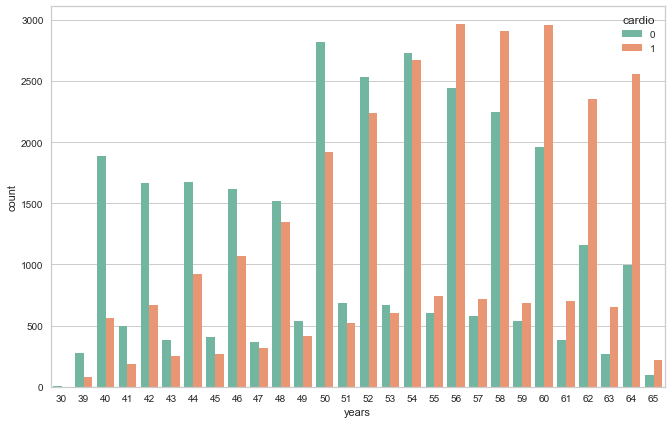

In [361]:
plt.figure(figsize=(11,7))
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

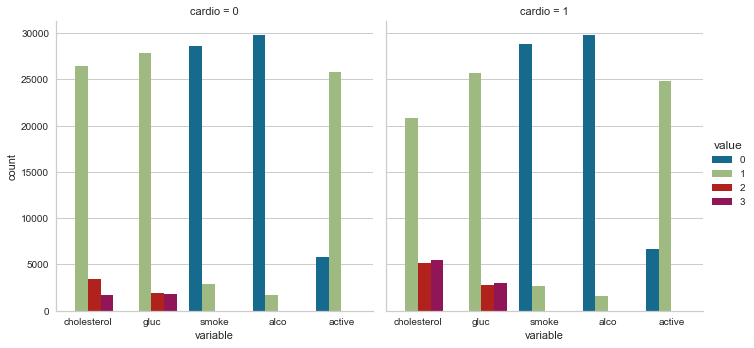

In [362]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
ax = sns.catplot(x="variable", hue="value", col="cardio", data=df_long, kind="count")

In [363]:
df.groupby('gender')["cardio"].mean()

gender
1    0.496648
2    0.505392
Name: cardio, dtype: float64

In [364]:
df['gender'].value_counts()

1    41025
2    21975
Name: gender, dtype: int64

In [365]:
df.groupby('gender')['alco'].mean()

gender
1    0.025277
2    0.106849
Name: alco, dtype: float64

In [366]:
df["alco"].value_counts()

0    59615
1     3385
Name: alco, dtype: int64

In [367]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.327778,0.172524
1,0.323413,0.176286


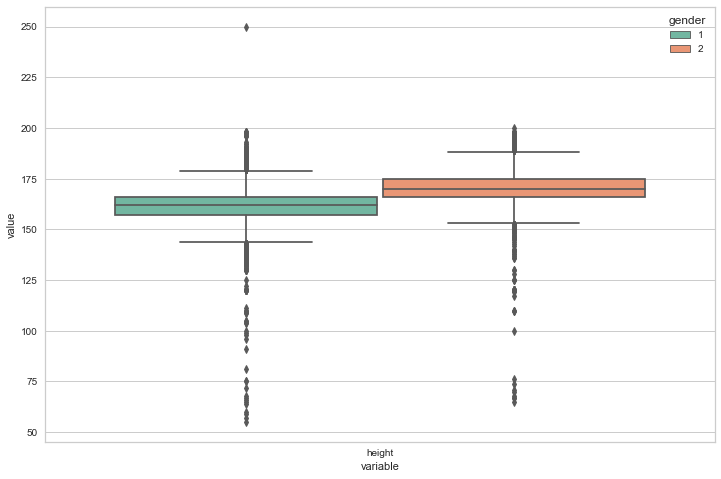

In [368]:
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x="variable", y="value", hue="gender", data=df_melt, palette="Set2",)

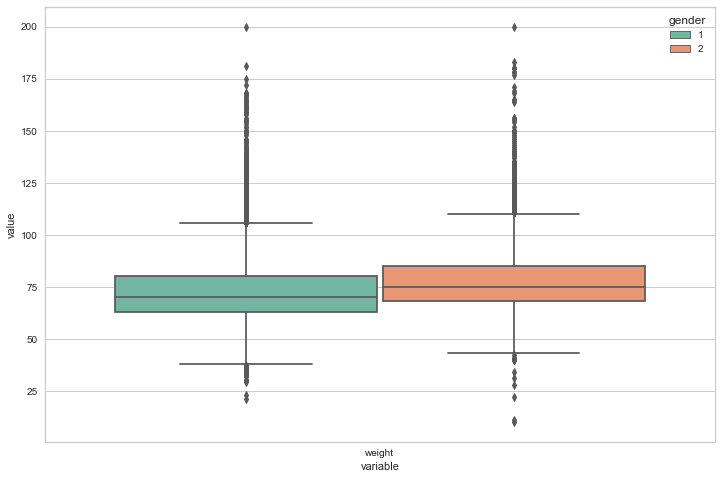

In [369]:
df_melt = pd.melt(frame=df, value_vars=['weight'], id_vars=['gender'])
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x="variable", y="value", hue="gender", data=df_melt, palette="Set2",)

In [370]:
df["outlier"] = 0

In [371]:
df.loc[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025)), "outlier"] = 1
df.loc[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025)), "outlier"] = 2

In [372]:
df.groupby("outlier")["cardio"].mean()

outlier
0    0.498300
1    0.524019
2    0.508986
Name: cardio, dtype: float64

In [373]:
df.drop(df[(df['height'] > df['height'].quantile(0.999)) | (df['height'] < df['height'].quantile(0.001))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.999)) | (df['weight'] < df['weight'].quantile(0.001))].index,inplace=True)

In [374]:
df.shape

(62789, 15)

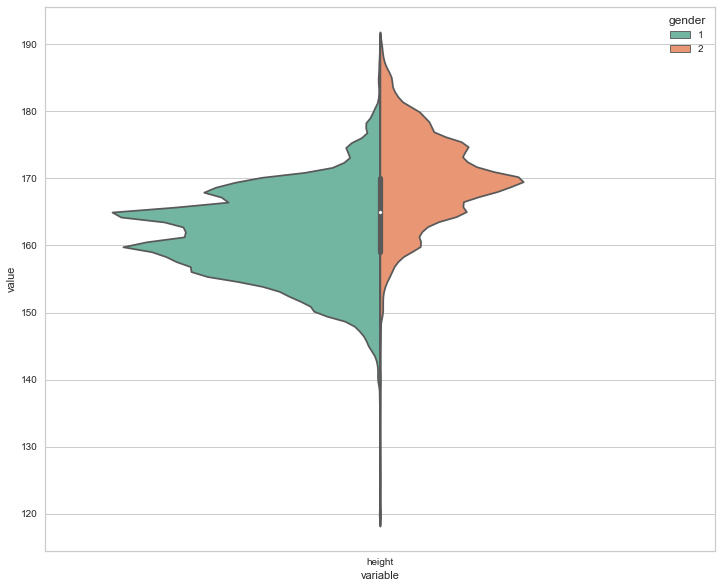

In [375]:
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(x='variable',
                    y='value',
                    hue='gender',
                    split=True,
                    data=df_melt,
                    scale='count',
                    scale_hue=False,
                    palette="Set2")

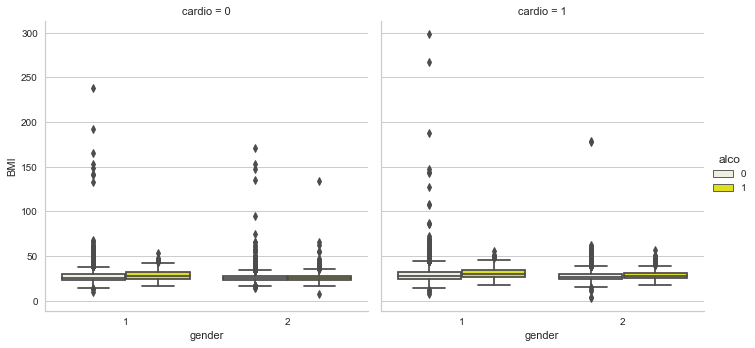

In [396]:
df['BMI'] = df['weight']/((df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=5, aspect=1);

In [377]:
df = pd.concat([X_train, y_train], axis=1)

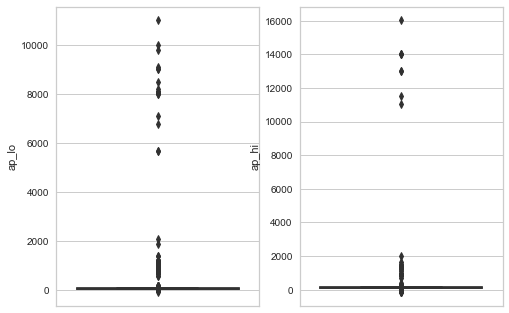

In [378]:
f, axes = plt.subplots(1,2)
sns.boxplot(y="ap_lo", data=df, ax = axes[0])
sns.boxplot(y="ap_hi", data=df, ax = axes[1])
plt.show()

In [379]:
df["bp_out"] = 0

In [380]:
a= df['ap_lo'].quantile(0.975)
b= df['ap_lo'].quantile(0.025)
c= df['ap_hi'].quantile(0.975)
d= df['ap_hi'].quantile(0.025)

In [381]:
df.loc[df['ap_lo'] > a, "ap_lo"] = a
df.loc[df['ap_lo'] < b, "ap_lo"] = b
df.loc[df['ap_hi'] > c, "ap_hi"] = c
df.loc[df['ap_hi'] < d, "ap_hi"] = d

In [238]:
df.loc[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025)), "bp_out"] = 1
df.loc[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025)), "bp_out"] = 2

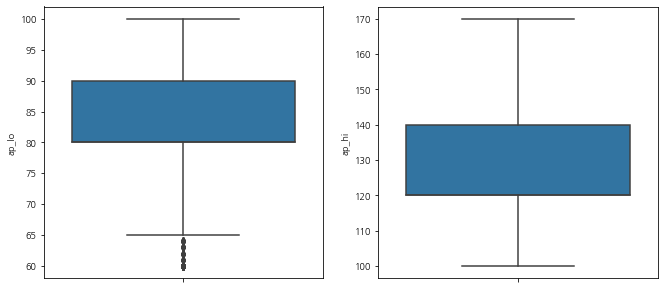

In [252]:
f, axes = plt.subplots(1,2)
sns.boxplot(y="ap_lo", data=df, ax = axes[0])
sns.boxplot(y="ap_hi", data=df, ax = axes[1])
plt.show()

<AxesSubplot:xlabel='bp_out', ylabel='cardio'>

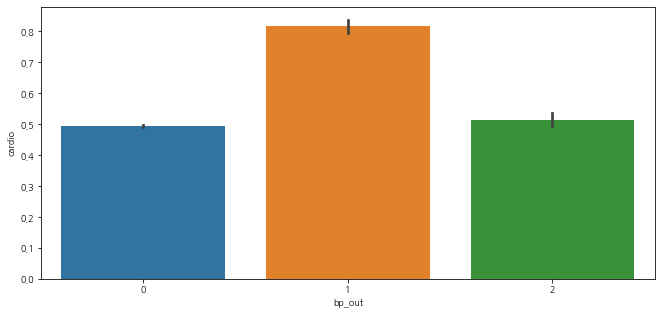

In [241]:
sns.barplot(data=df, x="bp_out", y="cardio")

<AxesSubplot:>

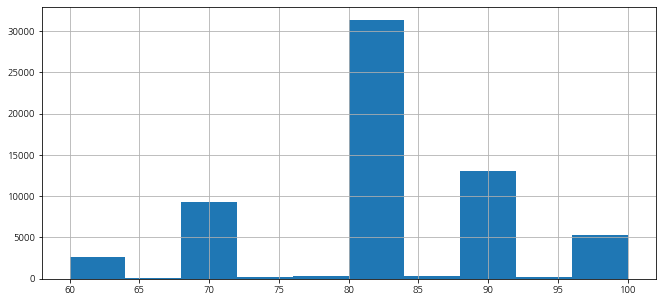

In [266]:
df["ap_lo"].hist()

<AxesSubplot:>

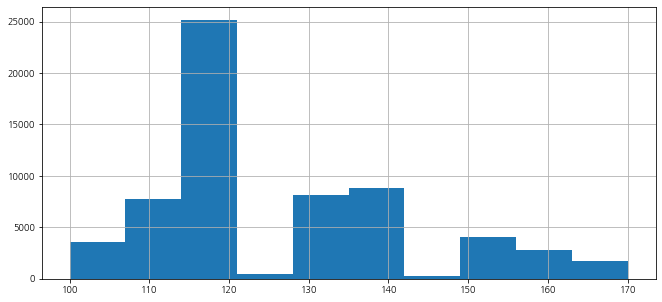

In [267]:
df["ap_hi"].hist()

In [397]:
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
34944,21664,1,169,68.0,140,80,1,1,0,0,1,1,23.808690
13034,19633,2,177,101.0,170,100,1,1,1,0,1,1,32.238501
29180,14613,1,166,50.0,100,70,1,1,0,0,1,0,18.144869


In [382]:
list(df)

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio',
 'bp_out']

In [389]:
df.drop(["bp_out"],axis=1, inplace=True)

In [390]:
df.shape

(63000, 12)

In [393]:
df["cardio"] = y_train

In [279]:
from pycaret.regression import *

In [398]:
data = setup(
    data=df,
    target='cardio',
    train_size=0.85,
    normalize=True,
    normalize_method='minmax',
    remove_perfect_collinearity=False,
    fold=10,
    numeric_features=["age","height","weight","ap_hi","ap_lo","BMI"]
)

,Description,Value
0,session_id,950
1,Target,cardio
2,Original Data,"(63000, 13)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(53549, 20)"


In [399]:
compare_models(sort="MSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3632,0.1807,0.4251,0.2769,0.2982,0.3628,0.6710
lightgbm,Light Gradient Boosting Machine,0.3602,0.1807,0.4251,0.2770,0.2981,0.3598,0.0700
xgboost,Extreme Gradient Boosting,0.3598,0.1850,0.4302,0.2596,0.3010,0.3598,0.5970
ada,AdaBoost Regressor,0.3745,0.1872,0.4326,0.2511,0.3035,0.3741,0.0850
lr,Linear Regression,0.3876,0.1911,0.4371,0.2354,0.3058,0.3922,0.3990
ridge,Ridge Regression,0.3876,0.1911,0.4371,0.2355,0.3058,0.3922,0.0220
br,Bayesian Ridge,0.3876,0.1911,0.4371,0.2355,0.3058,0.3922,0.0380
lar,Least Angle Regression,0.3895,0.1938,0.4401,0.2247,0.3074,0.3942,0.0250
huber,Huber Regressor,0.3744,0.1941,0.4405,0.2235,0.3044,0.3958,0.4000
omp,Orthogonal Matching Pursuit,0.3969,0.1964,0.4431,0.2143,0.3104,0.4008,0.0230


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=950, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [400]:
blender = blend_models(estimator_list=compare_models(n_select=2, sort="MSE"))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3665,0.1847,0.4298,0.2609,0.3006,0.3666
1,0.3619,0.1804,0.4247,0.2784,0.2977,0.3613
2,0.3627,0.1825,0.4271,0.2698,0.2988,0.3609
3,0.3628,0.1812,0.4257,0.2742,0.3004,0.3604
4,0.3593,0.1787,0.4227,0.2852,0.2970,0.3574
5,0.3609,0.1793,0.4234,0.2828,0.2972,0.3604
6,0.3643,0.1833,0.4281,0.2669,0.2998,0.3708
7,0.3566,0.1747,0.4180,0.3012,0.2946,0.3495
8,0.3633,0.1819,0.4265,0.2725,0.2987,0.3657


In [401]:
final = finalize_model(blender)

In [402]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
34944,21664,1,169,68.0,140,80,1,1,0,0,1,1,23.808690
13034,19633,2,177,101.0,170,100,1,1,1,0,1,1,32.238501
29180,14613,1,166,50.0,100,70,1,1,0,0,1,0,18.144869
26462,19674,1,158,67.0,110,70,1,1,0,0,1,0,26.838648
59116,15134,1,152,84.0,160,80,1,2,0,0,1,1,36.357341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10391,20323,1,154,83.0,150,80,2,1,0,0,1,1,34.997470
34438,23343,1,164,82.0,130,70,3,1,0,0,1,0,30.487805
52507,17439,1,153,94.0,100,70,1,1,0,0,0,0,40.155496
47674,16686,2,172,79.0,170,100,1,1,0,0,1,1,26.703624


In [403]:
X_test['BMI'] = X_test['weight']/((X_test['height']/100)**2)

In [404]:
X_test = X_test.drop("id", axis=1)

In [405]:
y_pred = predict_model(final, data=X_test)

In [406]:
y_crosstable = pd.DataFrame()

In [407]:
y_crosstable["real"] = y_test

In [408]:
y_crosstable["pred"] = y_pred["Label"]

In [409]:
y_crosstable = y_crosstable.reset_index()

In [410]:
y_crosstable.drop("index", axis=1, inplace=True)

In [411]:
def binx(x):
    if x>0.5:
        return 1
    else:
        return 0

In [412]:
y_crosstable["pred_bin"] = y_crosstable["pred"].map(lambda x: binx(x))

In [413]:
y_crosstable

,real,pred,pred_bin
0,0,0.626656,1
1,1,0.139035,0
2,1,0.688476,1
3,0,0.306998,0
4,0,0.225774,0
...,...,...,...
6995,1,0.891647,1
6996,1,0.496386,0
6997,0,0.635751,1
6998,1,0.819123,1


In [414]:
sum((y_crosstable["real"]==0) & (y_crosstable["pred_bin"]==0))

2684

In [415]:
from sklearn.metrics import confusion_matrix

In [416]:
accuracy_score(y_crosstable["real"], y_crosstable["pred_bin"])

0.738

In [417]:
confusion_matrix(y_crosstable["real"], y_crosstable["pred_bin"])

array([[2684,  818],
       [1016, 2482]], dtype=int64)